In [145]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [146]:
#Read in the data
data = pd.read_csv('austin_final.csv')

# the features or the 'x' values of the data
# these columns are used to train the model
# the last column, i.e, precipitation column
# will serve as the label 

X = data.drop(['PrecipitationSumInches'], axis = 1)

In [147]:
Y = data['PrecipitationSumInches']

# reshaping it into a 2-D vector

Y = Y.values.reshape(-1, 1)

In [148]:
X = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent',
                  'SeaLevelPressureAvgInches', 'VisibilityAvgMiles',
                  'WindAvgMPH'], axis = 1)

In [149]:
X

,TempAvgF,DewPointAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH
0,60,49,75,29.68,7,4
1,48,36,68,30.13,10,6
2,45,27,52,30.49,10,3
3,46,28,56,30.45,10,4
4,50,40,71,30.33,10,2
...,...,...,...,...,...,...
1314,89,67,54,29.97,10,5
1315,91,64,54,29.90,10,5
1316,92,64,51,29.86,10,4
1317,93,68,48,29.91,10,4


In [150]:
X.corr()
#less corr is better for linear regression - so we can use all of them

,TempAvgF,DewPointAvgF,HumidityAvgPercent,SeaLevelPressureAvgInches,VisibilityAvgMiles,WindAvgMPH
TempAvgF,1.000000,0.837222,0.022763,-0.138524,0.148463,0.034267
DewPointAvgF,0.837222,1.000000,0.450622,0.101505,0.056602,0.038257
HumidityAvgPercent,0.022763,0.450622,1.000000,0.069634,-0.449230,-0.000472
SeaLevelPressureAvgInches,-0.138524,0.101505,0.069634,1.000000,0.260125,0.046604
VisibilityAvgMiles,0.148463,0.056602,-0.449230,0.260125,1.000000,0.026522
WindAvgMPH,0.034267,0.038257,-0.000472,0.046604,0.026522,1.000000


In [151]:
Y

array([[0.46],
       [0.  ],
       [0.  ],
       ...,
       [0.  ],
       [0.  ],
       [0.  ]])

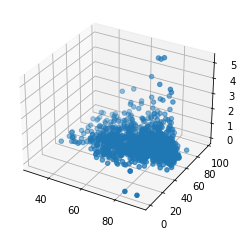

In [152]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[X.columns.values[0]], X[X.columns.values[2]], Y)

In [153]:
def train_val_test_split(X, Y):
    # for m*n matrix, we need to split it into 70 % training, 10 % validation and 20 % test
    #pick these values randomly and split the data

    # first we need to shuffle the data
    # we will use the permutation function from numpy
    # it will return a list of random numbers from 0 to m-1
    # where m is the number of rows in the data
    # we will use this list to shuffle the data

    m = X.shape[0]
    permutation = list(np.random.permutation(m))
    #augment X and Y so that the same permutation is applied to both
    X = np.hstack((X, Y))
    X = X[permutation, :]

    # now we can split the data - training = 70%, validation = 10%, test = 20%
    train_end = int(0.7 * m)
    val_end = int(0.1 * m) + train_end
    X_train = X[:train_end, :]
    X_val = X[train_end:val_end, :]
    X_test = X[val_end:, :]
    return X_train, X_val, X_test

X_train, X_val, X_test = train_val_test_split(X, Y)

In [154]:
'''
def train_val_test_split(X, Y):

    p = np.random.permutation(len(Y))

    tr = np.floor(len(Y)*0.7).astype('int')

    te = np.floor(len(Y)*0.8).astype('int')

    X_train = X[p[:tr],:]

    Y_train = Y[p[:tr]]

    X_val = X[p[tr+1:te],:]

    Y_val = Y[p[tr+1:te]]

    X_test = X[p[te+1:],:]

    Y_test = Y[p[te+1:]]

    return X_train, Y_train, X_val, Y_val, X_test, Y_test
    
'''

"\ndef train_val_test_split(X, Y):\n\n    p = np.random.permutation(len(Y))\n\n    tr = np.floor(len(Y)*0.7).astype('int')\n\n    te = np.floor(len(Y)*0.8).astype('int')\n\n    X_train = X[p[:tr],:]\n\n    Y_train = Y[p[:tr]]\n\n    X_val = X[p[tr+1:te],:]\n\n    Y_val = Y[p[tr+1:te]]\n\n    X_test = X[p[te+1:],:]\n\n    Y_test = Y[p[te+1:]]\n\n    return X_train, Y_train, X_val, Y_val, X_test, Y_test\n    \n"

In [155]:
#separate the features and labels
X_train = X_train[:, :-1]
Y_train = X_train[:, -1]
X_val = X_val[:, :-1]
Y_val = X_val[:, -1]
X_test = X_test[:, :-1]
Y_test = X_test[:, -1]

In [156]:
Y_train = Y_train.reshape(-1, 1)
Y_val = Y_val.reshape(-1, 1)

In [157]:
X_train = (X_train - np.mean(X_train, axis = 0)) / np.std(X_train, axis = 0)
X_train


array([[-0.49926994, -1.20933475, -0.73326055,  0.13269684,  0.53490751,
         1.43669995],
       [-0.64379751, -0.6221617 , -0.42308663,  0.01893468,  0.53490751,
        -1.4304872 ],
       [ 0.7292144 ,  0.74790876,  0.1972612 ,  0.0829259 ,  0.53490751,
        -0.47475815],
       ...,
       [-1.80001806, -1.60078345, -0.34554315,  0.11136644,  0.53490751,
         0.4809709 ],
       [-2.01680942, -1.33981765,  0.5849786 ,  0.09714617, -0.62952559,
        -0.95262267],
       [-0.49926994, -0.8831275 , -0.73326055,  0.20379819,  0.53490751,
         0.95883543]])

In [158]:
from sklearn.linear_model import LinearRegression

In [159]:
LR = LinearRegression()

In [160]:
LR.fit(X_train, Y_train)

LinearRegression()

In [161]:
print(LR.intercept_) #bias term
print(LR.coef_)


[4.99349946]
[[-1.40126597e-16  2.49800181e-16 -1.23906197e-16  5.75353530e-17
  -3.15317324e-16  2.09264331e+00]]


In [162]:
help(LR)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |   

In [163]:
Yhat_skl_val = LR.predict(X_val)

In [164]:
theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.transpose(), X_train)), X_train.transpose()), Y_train)

In [165]:
theta

array([[-6.80774881e-14],
       [ 7.07073289e-14],
       [-1.72631007e-14],
       [-7.22864693e-14],
       [ 1.88668525e-14],
       [ 2.09264331e+00]])

In [166]:
#get the intercept by augmenting X with 1s
X_train_aug = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_val_aug = np.hstack((np.ones((X_val.shape[0], 1)), X_val))


In [167]:
X_train_aug

array([[ 1.        , -0.49926994, -1.20933475, ...,  0.13269684,
         0.53490751,  1.43669995],
       [ 1.        , -0.64379751, -0.6221617 , ...,  0.01893468,
         0.53490751, -1.4304872 ],
       [ 1.        ,  0.7292144 ,  0.74790876, ...,  0.0829259 ,
         0.53490751, -0.47475815],
       ...,
       [ 1.        , -1.80001806, -1.60078345, ...,  0.11136644,
         0.53490751,  0.4809709 ],
       [ 1.        , -2.01680942, -1.33981765, ...,  0.09714617,
        -0.62952559, -0.95262267],
       [ 1.        , -0.49926994, -0.8831275 , ...,  0.20379819,
         0.53490751,  0.95883543]])

In [168]:
Yhat_skl_val = LR.predict(X_val)

In [169]:
theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train_aug.T, X_train_aug)), X_train_aug.T), Y_train)
theta

array([[ 4.99349946e+00],
       [-1.07205911e-15],
       [ 2.87964097e-16],
       [-6.10622664e-16],
       [ 5.17164436e-17],
       [-1.73472348e-17],
       [ 2.09264331e+00]])

In [170]:
X_train_aug = np.c_[X_train, np.ones(len(Y_train))]
X_val_aug = np.c_[X_val, np.ones(len(Y_val))]

In [171]:
theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train_aug.T, X_train_aug)), X_train_aug.T), Y_train)

In [172]:
hatY_aug = np.matmul(X_val_aug, theta)
theta

array([[ 3.12250226e-17],
       [ 8.36136715e-16],
       [-8.37004077e-16],
       [ 1.72388145e-17],
       [-1.73472348e-18],
       [ 2.09264331e+00],
       [ 4.99349946e+00]])

In [173]:
def init(X, zeros = True):
    if zeros:
        theta = np.zeros((X.shape[1], 1))
    else:
        theta = np.random.randn(X.shape[1], 1)-0.5
        theta[-1] = 0
    return theta

In [174]:
theta = init(X_train, zeros=False)

In [175]:
def predict(X, theta):
    return np.matmul(X, theta)

In [176]:
predict(X_train, theta)

array([[ 7.69052774e-01],
       [ 9.23676435e-01],
       [-2.93976059e+00],
       [-1.15734020e+00],
       [-3.22970651e+00],
       [-4.31805612e+00],
       [-1.40452217e+00],
       [-1.01683056e+00],
       [ 2.29595679e+00],
       [ 3.13174541e-01],
       [-9.96486862e-01],
       [-2.42108565e+00],
       [-2.74015911e+00],
       [ 2.71689685e+00],
       [-2.54258346e+00],
       [-2.99757199e+00],
       [-2.69605278e+00],
       [-2.28535961e+00],
       [-2.47032808e-01],
       [ 2.47983216e+00],
       [-3.26634643e+00],
       [ 4.41453930e-01],
       [ 1.44035019e+00],
       [-1.08403290e+00],
       [ 6.44568813e+00],
       [ 9.51254699e+00],
       [-5.18456847e-01],
       [-3.09860827e+00],
       [-2.23026354e+00],
       [ 1.57345859e+00],
       [-1.51535561e+00],
       [-3.77358414e+00],
       [-3.88081312e+00],
       [-2.47400456e+00],
       [-2.26416320e+00],
       [ 1.52381205e+00],
       [ 3.65523560e+00],
       [-1.15053874e+00],
       [ 2.8

In [177]:
#update the weights
def update(X, Y, theta, learning_rate):
    Yhat = predict(X, theta)
    theta = theta - learning_rate * np.matmul(X.T, (Yhat - Y))
    return theta

theta = update(X_train, Y_train, theta, 0.1)
theta

array([[245.23909128],
       [246.26824684],
       [  4.77121091],
       [148.34320229],
       [199.25589139],
       [209.16576171]])

In [178]:
learning_rate = 0.000001
dtheta = init(X_train)
for _ in range(1000):
    dtheta = update(X_train, Y_train, dtheta, learning_rate)
    print(theta)


[[245.23909128]
 [246.26824684]
 [  4.77121091]
 [148.34320229]
 [199.25589139]
 [209.16576171]]
[[245.23909128]
 [246.26824684]
 [  4.77121091]
 [148.34320229]
 [199.25589139]
 [209.16576171]]
[[245.23909128]
 [246.26824684]
 [  4.77121091]
 [148.34320229]
 [199.25589139]
 [209.16576171]]
[[245.23909128]
 [246.26824684]
 [  4.77121091]
 [148.34320229]
 [199.25589139]
 [209.16576171]]
[[245.23909128]
 [246.26824684]
 [  4.77121091]
 [148.34320229]
 [199.25589139]
 [209.16576171]]
[[245.23909128]
 [246.26824684]
 [  4.77121091]
 [148.34320229]
 [199.25589139]
 [209.16576171]]
[[245.23909128]
 [246.26824684]
 [  4.77121091]
 [148.34320229]
 [199.25589139]
 [209.16576171]]
[[245.23909128]
 [246.26824684]
 [  4.77121091]
 [148.34320229]
 [199.25589139]
 [209.16576171]]
[[245.23909128]
 [246.26824684]
 [  4.77121091]
 [148.34320229]
 [199.25589139]
 [209.16576171]]
[[245.23909128]
 [246.26824684]
 [  4.77121091]
 [148.34320229]
 [199.25589139]
 [209.16576171]]
[[245.23909128]
 [246.26824684